# Lista 4

In [1]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import time

## Exercício 1

Implementar método Francis. Utilizar matrizes simétricas com dimensões $n=10, 100, 500, 1000$.

In [14]:
def FrancisMethod(n, Max_It, Tol):
    
    # Definir matriz randomica de dimensão n
    # Transformar em Simetrica
    k = 0
    E = 0
    V = np.identity(n)
    A = np.zeros(shape=(n,n))
    for x in range (n):
        for y in range (n):
            A[x,y]=A[y,x]= np.random.randint(0,100)
            if (x!=y and abs(A[x][y]>E)):
                E = abs(A[x][y])

    #print("Matriz Original: ",A, "\n")

    while(E >= Tol and k < Max_It):              # Enquanto E > TOL e k < MAX_IT
        Q, R = scp.linalg.qr(A)                      # A0 = Calcular Fatoração = QR
        A = R@Q                                  # Definir A1 = RQ
        V = V@Q 

        for i in range(n):
            for j in range(n):
                if(i!=j and abs(A[i][j])>E):
                    E = abs(A[i][j])
        k += 1 

    return A

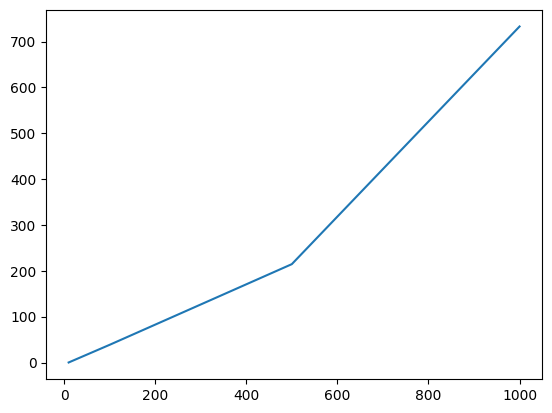

In [15]:
N = [10, 100, 500, 1000]
max_it = 10**3
tol = 10**-8
timeList = []

for i in N:
    t = time.time()
    FrancisMethod(i, max_it, tol)
    timeList.append(time.time() - t)


#print(temp)
plt.plot(N, timeList)

## Exercício 2

Implementar uma função que cria uma matriz cheia de dimensão $n$ e com $n$ autovalores.

#### Solução

Criar uma matriz diagonal $D_{n\times n}$ com os autovalores passados $\lambda_1, \lambda_2, ..., \lambda_n$. Utilizamos essa matriz para encontrar seus autovetores de forma a construir a matriz $M_{n\times n}$. Utilizando o teorema da Diagonalização ($D = M^{-1}AM$) e Semelhança de Matrizes ($\det A = \det D$), podemos dizer que $A = MDM^{-1}$, sendo $A_{n\times n}$ uma matriz semelhante a $D$, assim tendo os mesmos autovalores de $D$.

In [14]:
# DIAGONALIZAÇÃO - https://www.ufrgs.br/reamat/AlgebraLinear/livro/s11-diagonalizax00e7x00e3o.html
# SEMELHANÇA - https://pt.wikipedia.org/wiki/Matrizes_semelhantes

def CriaMatriz(n, autovalues):
    
    D = np.zeros(shape=(n,n))
    M = scp.stats.ortho_group.rvs(n)                          # Matriz de Autovalores

    if(len(autovalues) != n):
        return D
    
    for i in range(n):                              # Criar matriz diagonal (D) com autovalores
        D[i][i] = autovalues[i]

    A = M @ D @ np.linalg.inv(M)                    # Encontrar Matriz Semelhante A = MDM^{-1}

    return A

In [15]:
n = 10
lambdas = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

A = CriaMatriz(n, lambdas)
print("MATRIZ DE ORGIGEM: \n", np.round(A, 1))

autovalores, v = scp.linalg.eigh(A)
print("\nUtilizando função requisitada: \n", autovalores)


MATRIZ DE ORGIGEM: 
 [[ 5.6  0.8 -0.2  1.  -0.2 -0.  -2.1 -0.   0.8  0.1]
 [ 0.8  5.2 -1.9 -0.1 -1.9  0.2 -0.3  0.3  0.8  0.2]
 [-0.2 -1.9  6.8 -1.1  0.1 -0.1  0.1  1.  -1.4 -1. ]
 [ 1.  -0.1 -1.1  6.6 -0.8 -0.1  0.1  0.9 -0.7  0.8]
 [-0.2 -1.9  0.1 -0.8  4.4  0.8 -0.5 -0.4  1.6  0.1]
 [-0.   0.2 -0.1 -0.1  0.8  5.3  1.3  0.4  0.7  0.6]
 [-2.1 -0.3  0.1  0.1 -0.5  1.3  7.7 -0.8  0.1  0.5]
 [-0.   0.3  1.   0.9 -0.4  0.4 -0.8  5.   2.   0.7]
 [ 0.8  0.8 -1.4 -0.7  1.6  0.7  0.1  2.   5.   0.5]
 [ 0.1  0.2 -1.   0.8  0.1  0.6  0.5  0.7  0.5  3.5]]

Utilizando função requisitada: 
 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


## Exercício 3

$\begin{cases}Mw''+Kw=0\\\\ w(t)=\sum ^n_{k=1}\Phi^{(k)}*c_k*\sin(\omega_k t + \phi)\\\\ w''(t)=-\sum^n_{k=1}\Phi^{(k)}\sin(\omega_k t + \phi)\omega_k²\end{cases}\;\;\Rightarrow -\left(M * \sum^n_{k=1}\Phi^{(k)}\sin(\omega_k t + \phi)\omega_k²\right) + K \sum ^n_{k=1}\Phi^{(k)}*c_k*\sin(\omega_k t + \phi)=0 \Rightarrow \boxed{K\Phi^{(k)} = M\Phi^{(k)} \omega²_k}$ 

## Exercício 4

Calcular o coeficiente $c_k$ e $\phi_k$ a partir de uma condição inicial de posição $U_0$ e de uma velocidade inicial $V_0$.

Como temos que $\begin{cases}\alpha_i = \Phi^T_i M U_0\\\\ \beta_i = \Phi^T_i M V_0\end{cases}$.

$\begin{cases}w(0)=U_0=\sum ^n_{k=1}\Phi^{(k)}*c_k*\sin(\phi_k)\\\\ w'(0)=V_0=\sum ^n_{k=1}\Phi^{(k)}*c_k*\omega_k*\cos(\phi_k)\end{cases} \Rightarrow \begin{cases}\Phi^T_i M U_0 = \Phi^T_i M \sum ^n_{k=1}\Phi^{(k)}*c_k*\sin(\phi_k)\\\\ \Phi^T_i M V_0 = \Phi^T_i M \sum ^n_{k=1}\Phi^{(k)}*c_k*\omega_k*\cos(\phi_k)\end{cases} \Rightarrow \text{Quando k = i} \begin{cases}\alpha_i = c_i*\sin(\phi_i)\\\\ \beta_i = c_i*\omega_i*\cos(\phi_i)\end{cases}$

Assim podemos retirar os seguintes resultados: $$\phi_i = \arctg\left(\frac{\alpha_i \omega_i}{\beta_i}\right)$$ $$c_i = \frac{\alpha_i}{\sin\left(\arctg\left( \frac{\alpha_i \omega_i}{\beta_i} \right) \right)}$$

## Exercício 5

Alterações no código que gera matriz do problema de autovalores para resolver o problema de encontrar as oscilações de uma membrana de forma circular de raio $R=0.5$. Considerando $\phi = e = \sigma = 1$.

In [33]:
def ij2n (i, j, N):
    return i + j*N

def BuildMatrizesEigen(N1, N2, sigma, rho, e, delta1, delta2, raio):
    nunk = N1*N2

    # Stiffness matrix K: Build it as a sparse matrix
    d1 = 4.0*np.ones(nunk)
    d2 = -np.ones(nunk-1)
    d3 = -np.ones(nunk-N1)

    K = (sigma/delta1**2)*scp.sparse.diags([d3, d2, d1, d2, d3], [-N1, -1, 0, 1, N1], format='csr')
    
    # Force the eigenvalues associated to boundary points
    # to be a big number as compared to fundamental modes
    big_number = 10000
    Iden = big_number*scp.sparse.identity(nunk, format='csr')

    for i in range(N1):
        xi = i * delta1
        for j in range(N2):
            if((xi-0.5)**2 + ((j*delta2)-0.5)**2 > raio**2):
                Ic = ij2n(i, j, N1)
                K[Ic, :] = Iden[Ic, :]
                                          

    # Mass matrix: Simple case, multiple of identity
    M = rho*e*scp.sparse.identity(nunk, format='csr')

    return K, M

In [6]:
def PlotaMembrane(N1,N2,L1,L2,W):
    x = np.linspace(0, L1, N1)
    y = np.linspace(0, L2, N2)
    X,Y=np.meshgrid(x,y)
    Z = np.copy(W)
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set(xlabel='x', ylabel='y', title='Deslocamento vertical')
    im = ax.contourf(X, Y, Z, 20)
    im2 = ax.contour(X, Y, Z, 20, linewidths=0.25, colors='k')
    fig.colorbar(im, ax=ax)
    plt.show()

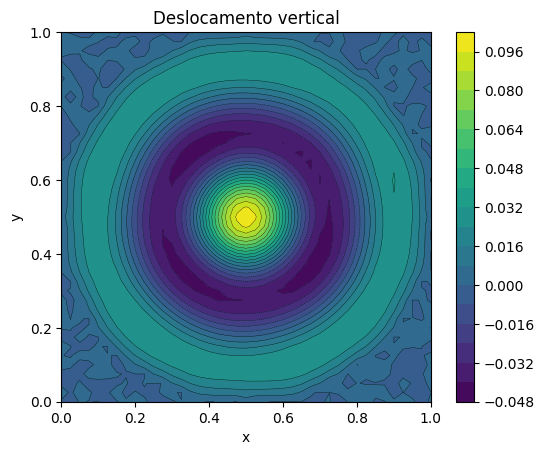

In [34]:
# Tamanho da grade
N1 = 41
N2 = 41
L1 = 1.0
L2 = 1.0

# Distancia entre pontos: Cuidado que L1/(N1-1) seja igual a L2/(N2-1)
delta1 = L1 / (N1-1) 
delta2 = L2 / (N2-1)

# Tensão da membrana
sigma = 1.0
rho = 1
e = 1
raio = 0.5

# Aplicar restrições nas bordas
K, M = BuildMatrizesEigen(N1, N2, sigma, rho, e, delta1, delta2, raio)
Lam, Q = scp.sparse.linalg.eigsh(K, k=20, M=M, which='SM')

k = 14
mode = Q[:,k] 
Wplot = mode.reshape(N2,N1)
PlotaMembrane(N1,N2,L1,L2,Wplot)

## Exercício 6

In [44]:
def ij2n (i, j, N):
    return i + j*N

def BuildMatrizesEigen2(N1, N2, sigma, e, delta):
    nunk = N1*N2

    rho = np.zeros(shape=(nunk, nunk))
    # Stiffness matrix K: Build it as a sparse matrix 
    d1 = 4.0*np.ones(nunk)
    d2 = -np.ones(nunk-1)
    d3 = -np.ones(nunk-N1)

    K = (sigma/delta**2)*scp.sparse.diags([d3, d2, d1, d2, d3], [-N1, -1, 0, 1, N1], format='csr')

    # Force the eigenvalues associated to boundary points 
    # to be a big number as compared to fundamental modes
    big_number = 10000
    Iden = big_number*scp.sparse.identity(nunk, format='csr')

    # Lados verticais
    for k in range(0,N2):
        Ic = ij2n(0,k,N1) # Left
        K[Ic,:], K[:,Ic] = Iden[Ic,:], Iden[:,Ic]

        Ic = ij2n(N1-1,k,N1) # Right
        K[Ic,:], K[:,Ic] = Iden[Ic,:], Iden[:,Ic]
        
    # Lados horizontais
    for k in range(0,N1):
        Ic = ij2n(k,0,N1) # Bottom
        K[Ic,:], K[:,Ic] = Iden[Ic,:], Iden[:,Ic]

        Ic = ij2n(k,N2-1,N1) # Top
        K[Ic,:], K[:,Ic] = Iden[Ic,:], Iden[:,Ic]

    # Mass matrix: Simple case, multiple of identity

    for i in range(nunk):
        xi = i * delta
        for j in range(nunk):
            yj = j *delta
            rho[i,j] = 1 + (0.75*np.cos(4*np.pi*xi)*np.cos(2*np.pi*yj))

    A = scp.sparse.identity(nunk, format='csr')
    M = A.multiply(rho * e) 
    
    return K, M    

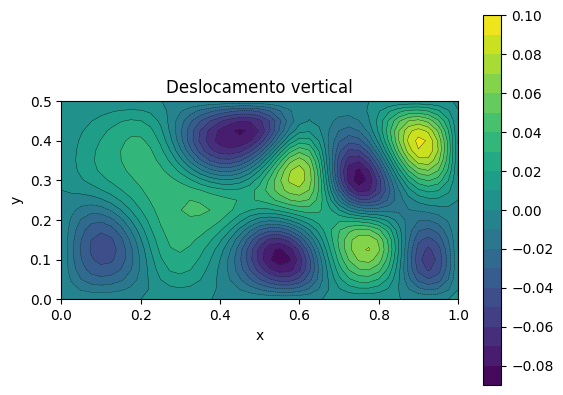

In [46]:
L1 = 1
L2 = 0.5
e = 1

N1 = 41 
N2 = 21

delta1 = L1 / (N1-1) 

K, M = BuildMatrizesEigen2(N1, N2, 1, e, delta1)

Lam, Q = scp.sparse.linalg.eigsh(K, k=20, M=M, which='SM')

k = 12
mode = Q[:,k] 
Wplot = mode.reshape(N2,N1)
PlotaMembrane(N1,N2,L1,L2,Wplot)